# Linear Regression Lab

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots


In [3]:
import statsmodels .api as sm

In [4]:
from statsmodels .stats. outliers_influence \
import variance_inflation_factor as VIF
from statsmodels .stats.anova import anova_lm

In [5]:
from ISLP import load_data
from ISLP.models import ( 
    ModelSpec as MS,
    summarize, 
    poly
)

## Surveying Namespaces

In [6]:
print(dir()) #printing the list of objects in the namespace (top level) 

['In', 'MS', 'Out', 'VIF', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_ih', '_ii', '_iii', '_oh', 'anova_lm', 'exit', 'get_ipython', 'load_data', 'np', 'open', 'pd', 'poly', 'quit', 'sm', 'subplots', 'summarize']


In [7]:
A = np.array ([3 ,5 ,11])
print(dir(A)) #printing namespace of the "A" numpy array

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_namespace__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__buffer__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__'

In [8]:
A.sum() #'sum()' is one of the objects in the namespace of array "A"

np.int64(19)

## Loading The Dataset

In [9]:
Boston = load_data('Boston') # Loading "Boston" dataset
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [10]:
#Boston? # Dataframe info

## Simple Linear Regression

In [11]:
# creating a model matrix of one predictor 'lsat' and intercept of 1
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lsat': Boston['lstat']}) 

In [12]:
X[:4] 

,intercept,lsat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [13]:
# isolating the response variable
y = Boston['medv']

In [14]:
# fitting the model
model = sm.OLS(y, X)
results = model.fit()

##### Enrichment Questions 

1. How is the standard error computed. 
2. How is the standard error interpreted. 
3. How is the t-statistic computed? 
4. How is the t-statistic interprerted.
5. How is the p-value computed.
6. Ho is the p-value interpreted. 

In [15]:
# printing the model specs
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lsat,-0.9500,0.039,-24.528,0.0


`ModelSpec()` aka `MS()` creates a transform object.  

Transfroms provide a way to pecify interac-tions between variables, and expand some particular variables into sets of
variables (e.g. polynomials)

The `fit()` method takes the original array and may do some initial com-
putations on it, as specified in the transform object.

The `transform()` method applies the fitted transformation to the array of data,
and produces the model matrix.

In [16]:
# creating a transfrom for the single predictor (in two steps)
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


These two operations can be combined with the `fit_transform()` method.  

As above, the design object is changed as a result of the `fit()` operation.

In [17]:
# creating a transfrom for the single predictor (in one steps)
design = MS(['lstat'])
X = design. fit_transform (Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [18]:
print(dir(results)) # all methods available in the "results" namespace

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_get_wald_nonlinear', '_is_nested', '_transform_predict_exog', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_pred

In [19]:
results.summary () # provides an exhaustive summary of the fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 23 May 2025   Prob (F-statistic):           5.08e-88
Time:                        02:41:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lsat          -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results.params # retrieves the fitted coefficients

intercept    34.553841
lsat         -0.950049
dtype: float64

The `get_prediction()` method can be used to obtain predictions, and produce confidence intervals and prediction intervals for the prediction of `medv` for given `values` of lstat.

In [21]:
# create a new input matrix
new_df = pd.DataFrame ({'lstat':[5, 10, 15]})
newX = design.transform (new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [22]:
new_predictions = results.get_prediction(newX)

In [23]:
new_predictions.predicted_mean # prediction values

array([29.80359411, 25.05334734, 20.30310057])

In [24]:
new_predictions.conf_int(alpha =0.05) # produce confidence intervals

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [25]:
new_predictions.conf_int(obs=True , alpha =0.05) # produces prediction interval

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

### Plotting the Model

In [26]:
def abline(ax , b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim, *args, **kwargs)

/var/folders/dt/53bpx70s19ndyhz8nj3phw1h0000gn/T/ipykernel_47961/3652267510.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax ,results.params[0], results.params[1],'r--', linewidth=3)


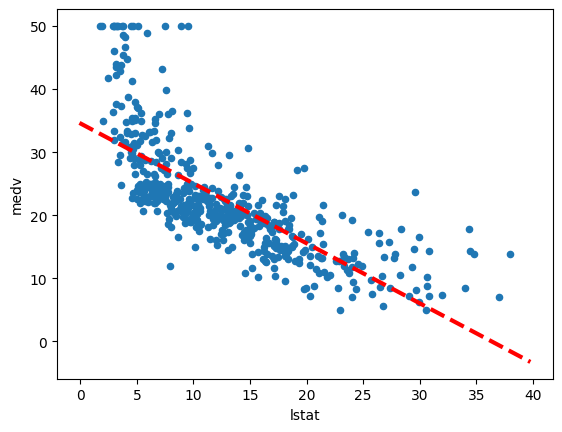

In [27]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax ,results.params[0], results.params[1],'r--', linewidth=3)

### Residuals vs Fitted Values for `LSTAT`

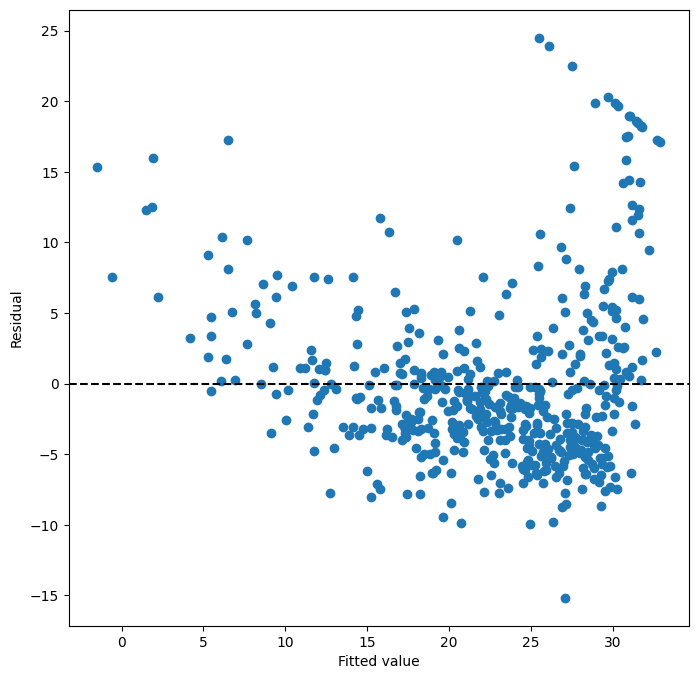

In [28]:
ax = subplots (figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax. set_xlabel ('Fitted value')
ax. set_ylabel ('Residual')
ax.axhline (0, c='k', ls='--');

### Leverage Statistics

np.int64(374)

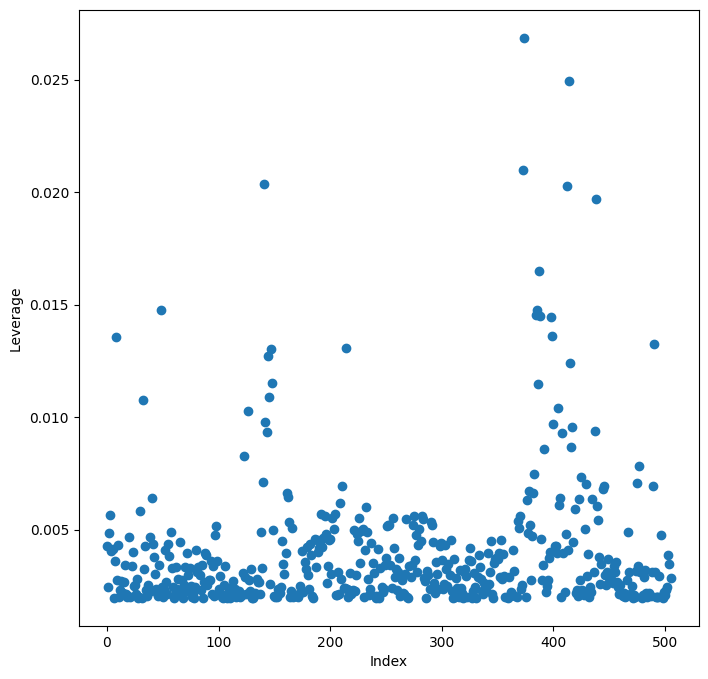

In [29]:
infl = results.get_influence()
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape[0]) , infl.hat_matrix_diag)
ax. set_xlabel('Index')
ax. set_ylabel('Leverage ')
np.argmax(infl.hat_matrix_diag)

## Multiple Linear Regression

In [30]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model0 = sm.OLS(y, X)
results0 = model0.fit()
summarize(results0)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [31]:
terms = Boston.columns.drop('medv')
print(terms.values)

['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'lstat']


In [32]:
X = MS(terms). fit_transform (Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [33]:
minus_age = Boston.columns.drop(['medv', 'age']) # age and indus have high p-values
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


### Multivariate Goodness Fit

In [34]:
results.rsquared 

np.float64(0.7343070437613075)

In [35]:
results1.rsquared

np.float64(0.7342674984601645)

In [36]:
np.sqrt(results.scale) 

np.float64(4.798034335596368)

In [37]:
np.sqrt(results1.scale) 

np.float64(4.793532256301406)

#### Variance Inflation Factors

##### Enrichment Questions 

1. How is VIF computed. 
2. How is the VIF interpreted. 

In [38]:
vals = [VIF(X, i) for i in range (1, X.shape [1])]

vif = pd. DataFrame ({'vif ':vals},
index=X.columns [1:])

vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


#### Interaction Terms

In [39]:
# creates and interaction term from "lstat" and "age"
X = MS(['lstat','age', ('lstat', 'age')]).fit_transform(Boston) 
model2 = sm.OLS(y, X)
results2 = model2.fit ()
summarize(results2)

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


#### Non-linear transformation of Predictors

In [40]:
X = MS([poly('lstat', degree =2) , 'age']). fit_transform (Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize (results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


##### Enrichment Questions 

1. How is the F-statistic computed. 
2. How is the F-statistic interpreted. 

In [41]:
anova_lm(results0, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


### Residuals vs Fitted Values for `LSTAT` and `AGE`

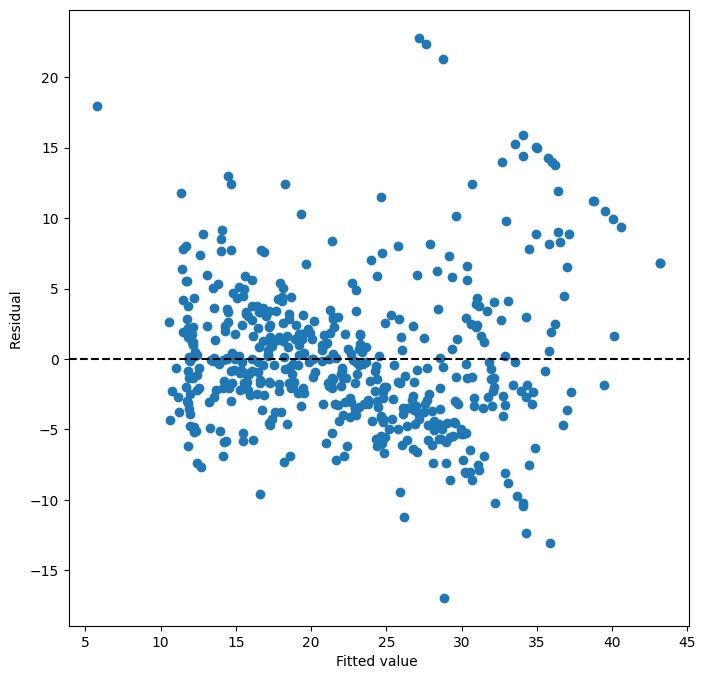

In [42]:
ax = subplots(figsize=(8 ,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax. set_xlabel('Fitted value ')
ax. set_ylabel('Residual ')
ax.axhline(0, c='k', ls='--');

### Qualitative Predictors

In [43]:
Carseats = load_data ('Carseats')
Carseats .columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [44]:
allvars = list(Carseats .columns.drop('Sales'))
y = Carseats ['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final). fit_transform ( Carseats )
model = sm.OLS(y, X)
summarize (model.fit ())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
